<a href="https://colab.research.google.com/github/sarankumar1325/CRYPTO-PRICE-FORECASTING-USING-LSTM/blob/main/CRYPTO_CURRENCY_FORECASTING_USING_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Analysis**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/content/btc.csv')
print("Dataset loaded. Total records:", data.shape[0])

# Display the first few rows
data.head()


Dataset loaded. Total records: 2713


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

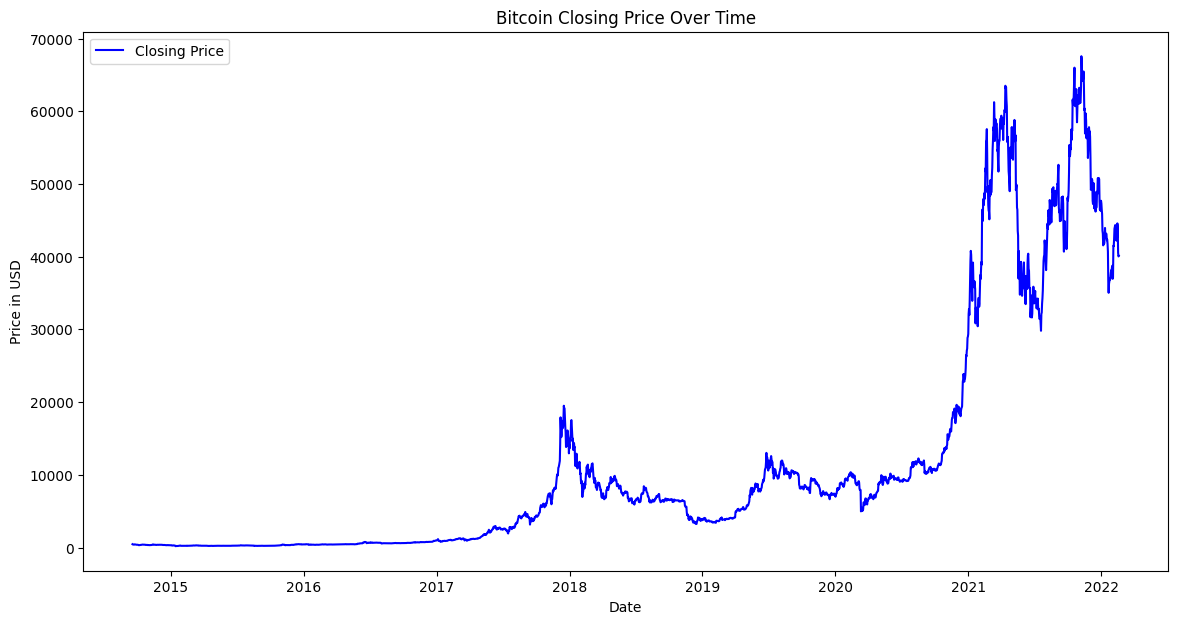

In [4]:
# Plot Bitcoin closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], color='blue', label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

**Data Preprocessing for LSTM**

In [5]:
# Scale data to the range (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [6]:
# Create sequences
sequence_length = 60
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

In [7]:
# Convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshape the data to 3D format for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("Data reshaped for LSTM:", X_train.shape)

Data reshaped for LSTM: (2653, 60, 1)


**Building the LSTM Model**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print("LSTM model compiled.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM model compiled.


**Train the Model**

In [10]:
# Train the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
print("Model training completed.")

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5567e-04 - val_loss: 0.0097
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 9.9091e-04 - val_loss: 0.0027
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.4456e-04 - val_loss: 0.0022
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.4597e-04 - val_loss: 0.0023
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.8488e-04 - val_loss: 0.0070
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.0031e-04 - val_loss: 0.0021
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.7441e-04 - val_loss: 0.0028
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.8210e-04 - val_loss: 0.0015
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.6288e-04 - val_loss: 0.0020
Epoch 12/50
75/75 ━━━━━━━━━━

**Training and Validation Loss Visualization**

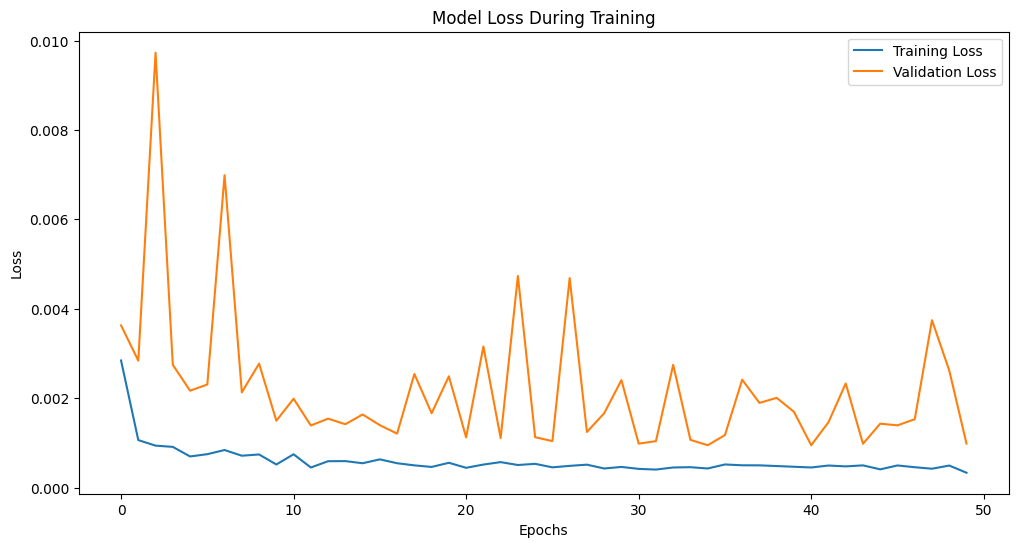

In [11]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Predict Future Prices**

In [12]:
# Prepare test dataset (use a new dataset or split from original)
test_data = data[-sequence_length:]
inputs = scaler.transform(test_data['Close'].values.reshape(-1, 1))

In [13]:
X_test, y_test = [], []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i-sequence_length:i, 0])

In [14]:
# Check if X_test is populated and has the correct shape
if len(X_test) == 0:
    print("Error: X_test is empty. Check sequence_length or test data preparation.")
else:
    X_test = np.array(X_test)
    print("X_test shape before reshaping:", X_test.shape)  # Debugging statement

    # Reshape if X_test is populated correctly
    try:
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        print("X_test reshaped for prediction:", X_test.shape)
    except IndexError:
        print("Error: Reshaping failed. Check dimensions of X_test.")

Error: X_test is empty. Check sequence_length or test data preparation.


In [15]:
# Prepare the test data for sequences
sequence_length = 60  # Ensure this is not larger than the available test data points
test_data = data['Close'].values[-(sequence_length + 100):]  # Adjust to ensure enough data

# Scale and transform test data
inputs = scaler.transform(test_data.reshape(-1, 1))

# Populate X_test based on sequence_length
X_test = []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i-sequence_length:i, 0])

# Confirm data population
if len(X_test) == 0:
    print("Error: X_test is still empty. Check data range and sequence length.")
else:
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    print("X_test prepared successfully:", X_test.shape)

X_test prepared successfully: (100, 60, 1)


In [16]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


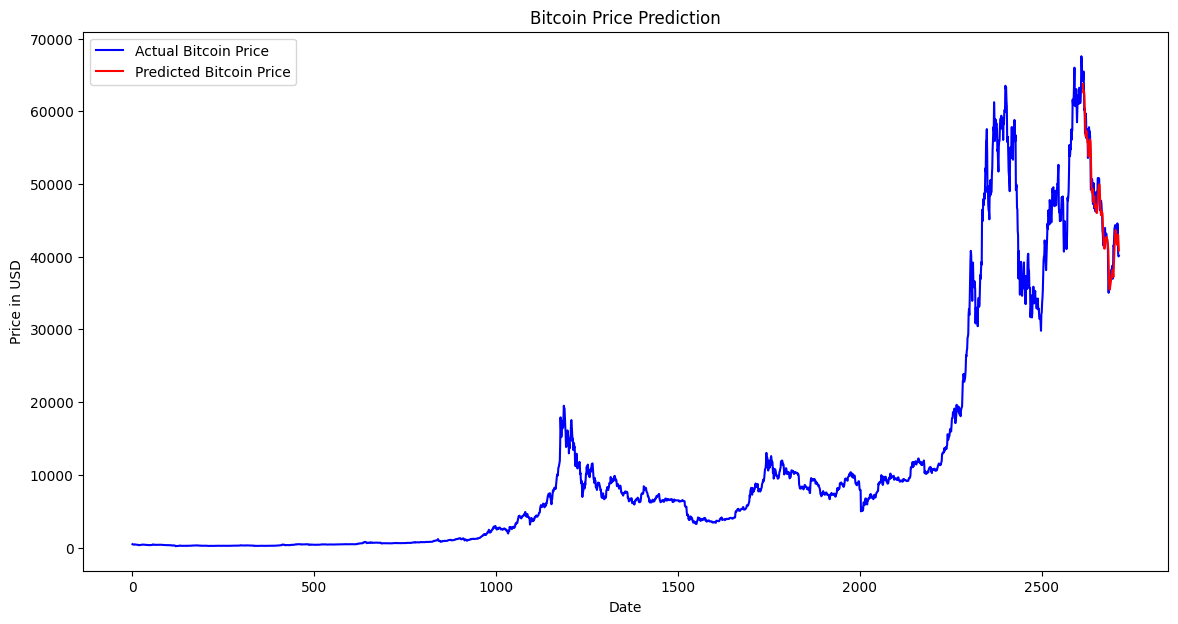

In [18]:
# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(data['Close'].values, color='blue', label='Actual Bitcoin Price')
plt.plot(range(len(data) - len(predicted_prices), len(data)), predicted_prices, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

**Evaluation**

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(data['Close'][-len(predicted_prices):], predicted_prices))
mae = mean_absolute_error(data['Close'][-len(predicted_prices):], predicted_prices)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 1810.4501354423396
Mean Absolute Error: 1455.7246094224995
